*We will need a systematic way to sample in the fitting parameters space that go into TOPAS (Rietveld Refinement Program); this includes parameters like the relative phase fraction as a starting point.


 
#### **Relationship Between Scale Factor ($ S_p $) and Relative Weight Fraction ($ W_p $ ) in Multi-phase Rietveld Refinement**

Check out: **Dinnebier, Leineweber and Evans: *Rietveld Refinement: Practical Powder Diffraction Pattern Analysis using TOPAS*, 2018 (Page 53)**

The relationship between the scale factor and the relative weight fraction is expressed by the following equation:

$$
W_p = \frac{S_p \cdot Z \cdot M \cdot V}{K \cdot \mu^*_m}
$$

Where:

- $ W_p $ is the relative weight fraction of phase $ p $ in a mixture of several crystalline phases.
- $ S_p $ is the scale factor of phase $ p $.
- $ Z $ is the number of formula units of phase $ p $ in the unit cell.
- $ M $ is the molecular mass of the formula unit of phase $ p $.
- $ V $ is the volume of the unit cell in Å³ of phase $ p $.
- $ K $ is a scaling factor that depends on the instrumental conditions and is independent of sample and phase-related parameters.
- $ \mu^*_m $ is the mass absorption coefficient (MAC) of the **entire sample**.

---

#### **Mass Absorption Coefficient (MAC) Calculation:**

The mass absorption coefficient for each phase can be calculated from its linear absorption coefficient using the formula:

$$
\text{MAC}_p = \frac{\text{LAC}_p}{\rho_p}
$$

Where:

- $ \text{MAC}_p $ is the mass absorption coefficient of phase $ p $,
- $ \text{LAC}_p $ is the linear absorption coefficient of phase $ p $,
- $ \rho_p $ is the density of phase $ p $.

To compute the total mass absorption coefficient $ \mu^*_m $ of the sample, we take a weighted sum of the MAC values for all phases based on their weight fractions:

$$
\mu^*_m = \sum W_p \cdot \text{MAC}_p
$$

---

So:

- The scaling factor $ K $ accounts for instrument-related conditions but remains constant across phases and samples.
- The mass absorption coefficient $ \mu^*_m $ is constant for all phases.
- Therefore, quantitative Rietveld refinements are usually performed without knowing $ K $ or $ \mu^*_m $—both are predetermined in this case.

 

#### Now let's compute for our 3-phase system: Corundum (Cor), Fluorite (Flu), and Zincite (Zin)


#### Initial parameters

In [7]:
# ZM values
ZM_Cor, ZM_Flu, ZM_Zin = 611.768, 312.299, 162.817

# V values
V_Cor, V_Flu, V_Zin = 254.123, 162.023, 47.290

# ZMV values
ZMV_Cor = ZM_Cor * V_Cor
ZMV_Flu = ZM_Flu * V_Flu
ZMV_Zin = ZM_Zin * V_Zin

# LAC values
LAC_Cor, LAC_Flu, LAC_Zin = 126.283, 303.163, 278.222

# Density values
density_Cor, density_Flu, density_Zin = 3.997530, 3.200700, 5.717180

# MAC values
MAC_Cor = LAC_Cor / density_Cor  # approximately 31.6
MAC_Flu = LAC_Flu / density_Flu  # approximately 94.7
MAC_Zin = LAC_Zin / density_Zin  # approximately 48.7

K_external = 427.6


print("MAC_Cor:", MAC_Cor)
print("MAC_Flu:", MAC_Flu)
print("MAC_Zin:", MAC_Zin)

print("ZMV_Cor:", ZMV_Cor)
print("ZMV_Flu:", ZMV_Flu)
print("ZMV_Zin:", ZMV_Zin)

MAC_Cor: 31.59025698368743
MAC_Flu: 94.71771799918768
MAC_Zin: 48.664201581898766
ZMV_Cor: 155464.319464
ZMV_Flu: 50599.620876999994
ZMV_Zin: 7699.61593


#### Functions to compute scale factor with random relative weight fractions

In [8]:
import random
import numpy as np


# def generate_random_weight_fraction():
#     r1 = random.uniform(0, 1)
#     r2 = random.uniform(0, 1 - r1)
#     r3 = 1 - r1 - r2
#     return r1, r2, r3

def generate_random_weight_fraction():
    weights = np.random.dirichlet([1, 1, 1])
    return weights[0], weights[1], weights[2]


def compute_Um(weight_fraction, MAC_Cor, MAC_Flu, MAC_Zin):
    w1, w2, w3 = weight_fraction
    Um = w1 * MAC_Cor + w2 * MAC_Flu + w3 * MAC_Zin
    return Um


# Compute scale factors
def compute_scale_factors(weight_fraction,
                          Um,
                          ZM_Cor, ZM_Flu, ZM_Zin,
                          V_Cor, V_Flu, V_Zin, K):
    w1, w2, w3 = weight_fraction

    S_Cor = (w1 * K) / (ZM_Cor * V_Cor * Um)
    S_Flu = (w2 * K) / (ZM_Flu * V_Flu * Um)
    S_Zin = (w3 * K) / (ZM_Zin * V_Zin * Um)

    return S_Cor, S_Flu, S_Zin


weight_fraction_random = generate_random_weight_fraction()
Um_random = compute_Um(weight_fraction_random, MAC_Cor, MAC_Flu, MAC_Zin)
scale_factors_random = compute_scale_factors(weight_fraction_random,
                                             Um_random,
                                             ZM_Cor, ZM_Flu, ZM_Zin,
                                             V_Cor, V_Flu, V_Zin, K_external)

weight_fraction_random, Um_random, scale_factors_random

((0.2547050307316389, 0.5100105056355465, 0.2352844636328146),
 67.80315919257751,
 (1.0332241763525795e-05, 6.35652305000068e-05, 0.00019271341842980037))

#### Generate .txt file (to be included in TOPAS) : `test_ModelParams_S1.txt`

In [9]:
import pandas as pd

# Create a list of scale factors for multiple runs
num_runs = 50
weight_fraction_results = []
scale_factors_results = []

for i in range(num_runs):
    weight_fraction_random = generate_random_weight_fraction()
    Um_random = compute_Um(weight_fraction_random, MAC_Cor, MAC_Flu, MAC_Zin)
    scale_factors_random = compute_scale_factors(
        weight_fraction_random, Um_random, ZM_Cor, ZM_Flu, ZM_Zin, V_Cor, V_Flu, V_Zin, K_external)

    weight_fraction_results.append(weight_fraction_random)
    scale_factors_results.append((i, *scale_factors_random))

# print(weight_fraction_results)
# print(scale_factors_results)

# Check with dataframe
df = pd.DataFrame(weight_fraction_results, columns=[
                  'Corundum', 'Fluorite', 'Zincite'])
display(df.head())

,Corundum,Fluorite,Zincite
0,0.283019,0.091203,0.625778
1,0.200997,0.182942,0.616061
2,0.812718,0.046086,0.141196
3,0.510093,0.256255,0.233652
4,0.727288,0.231737,0.040975


Need to install the `mpltern` library to plot the ternary diagram.

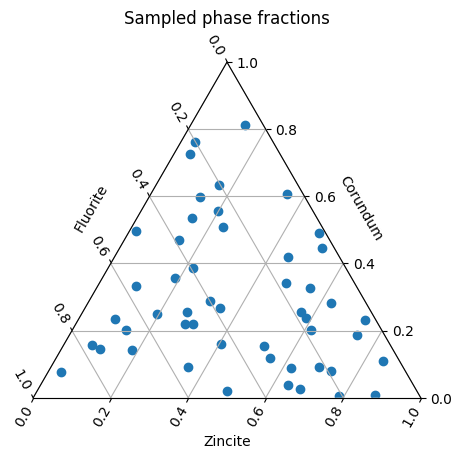

In [10]:
import matplotlib.pyplot as plt
import mpltern

# Plot using mpltern for ternary plot
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='ternary')

a_values, b_values, c_values = zip(*weight_fraction_results)

ax.scatter(a_values, b_values, c_values)
ax.set_tlabel('Corundum')
ax.set_llabel('Fluorite')
ax.set_rlabel('Zincite')
ax.set_title('Sampled phase fractions')

ax.taxis.set_label_position('tick1')
ax.laxis.set_label_position('tick1')
ax.raxis.set_label_position('tick1')
ax.grid()

plt.savefig("ternary_plot.png", dpi=300, bbox_inches='tight')

plt.show()

In [11]:
# Writing the results to .txt file
with open("test_ModelParams_S1.txt", "w") as file:
    file.write("#list seq_no scale_cor scale_caf scale_zin\n{\n")
    for scale_factors_result in scale_factors_results:
        file.write(
            f"{scale_factors_result[0]}\t{scale_factors_result[1]:.9f}\t{scale_factors_result[2]:.9f}\t{scale_factors_result[3]:.9f}\n")
    file.write("}\n")
    file.write(f"num_runs {num_runs}\n")